In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### calcular a aceleração pela formula de Somigliana

In [2]:
a = 6378137.0
b = 6356752.3142
ga = 9.7803253359
gb = 9.8321849378

data = np.loadtxt('eigen-6c3stat-0_5-mundo.txt')

numerador = a * ga * np.cos(np.pi*data[:,1]/180)**2 + b*gb*np.sin(np.pi*data[:,1]/180)**2
denominador = np.sqrt(a**2 * (np.cos(np.pi*data[:,1]/180)**2) + b**2*(np.sin(np.pi*data[:,1]/180)**2))

somig = numerador/denominador

NameError: name 'lat' is not defined

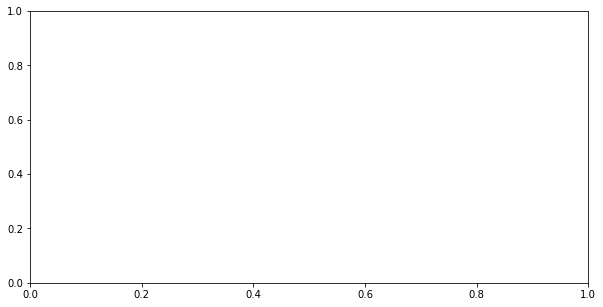

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lat, somig)
ax.set_xlabel('Latitude (º)', fontsize=14)
ax.set_ylabel('g (m/s$^2$)', fontsize=14)
ax.set_title('Aceleração da gravidade calculada pela fórmula de Somigliana', fontsize=14)
ax.set_xlim([-90, 90])
ax.set_ylim([9.75, 9.85])
ax.grid()
plt.show()

**Explique o gráfico acima.** Quais fatores contribuem para este comportamento?

# Mapa de Topografia

In [ ]:
# minha seleção - está funcionando e é mais rápido do que plotar tudo e selecionar a área depois
data = np.loadtxt('eigen-6c3stat-0_5-mundo.txt')
#area = [15.0, -60.0, -90.0, -30.0]      # [lat_min, lat_max, lon_min, lon_max]    América do Sul
area = [-10.0, -30.0, -80.0, -60.0]    # [lat_min, lat_max, lon_min, lon_max]    América do Sul (zoom nos Andes)
#area = [60.0, 10.0, 50.0, 120.0]       # [lat_min, lat_max, lon_min, lon_max]    Himalaia

if area[2] < 0:
    area[2] = 360 + area[2]
if area[3] < 0:
    area[3] = 360 + area[3]

d_lat = 0.5
d_lon = 0.5

# seleciona latitudes
lat1 = np.abs(data[:,1]-area[0]).argmin()
lat2 = np.abs(data[:,1]-area[1] + d_lat).argmin()
data2 = data[lat1:lat2, :]

# seleciona longitudes
lon_inds = np.where((data2[:,0] > area[2]) & (data2[:,0] < (area[3] + d_lon)))
data3 = data2[lon_inds[0], :]

# reorganiza as informações
lon, lat, alt, gamma = data3[:,0], data3[:,1], data3[:,2], data3[:,3]
alt2 = np.reshape(alt, [int(np.abs(area[1]-area[0])/d_lat)+1, int(np.abs(area[3]-area[2])/d_lon)])
lon2 = lon[:int(np.abs(area[3]-area[2])/d_lon)]
lat2 = np.reshape(lat, [int(np.abs(area[1]-area[0])/d_lat)+1, int(np.abs(area[3]-area[2])/d_lon)])[:, 1]

# plota o mapa
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
z = plt.contourf(lon2, lat2, alt2, 60, transform=ccrs.PlateCarree(), cmap='hot_r')
plt.colorbar(z, ax=ax, label='Elevação (m)', shrink=0.5)

ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_title('Topografia', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
(somig[-1]*1e5)   # conversão para mGal

In [ ]:
gamma[-1]